# 🍽️ Zomato Bangalore EDA Project

## 📌 Objective:
- To analyze restaurant data in Bangalore to uncover insights related to:
- Popular cuisines and areas
- Price vs rating trends
- Service availability impact
- Actionable insights for Zomato business decisions

---

**Dataset Source:** [Kaggle - Zomato Bangalore Restaurants](https://www.kaggle.com/datasets/sudalairajkumar/zomato-bangalore-restaurants)




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("zomato.csv")

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.shape

(51717, 17)

In [5]:
df.size

879189

In [6]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [8]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [9]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
low_importance = ['url','address','phone','location']
df.drop(columns=low_importance, inplace=True)

In [12]:
df.rename(columns={"approx_cost(for two people)":"average_cost",
                   "listed_in(type)":"restaurant_type",
                   "listed_in(city)": "locality"}, inplace=True)

In [13]:
df["rate"]= df["rate"].astype(str).str.split('/').str[0].str.strip()
df["rate"] = pd.to_numeric(df["rate"], errors='coerce')

In [14]:
df.head()

,name,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
0,Jalsa,Yes,Yes,4.1,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Data Visualization

#### Are the locations of restaurants localised to specific parts of city?¶


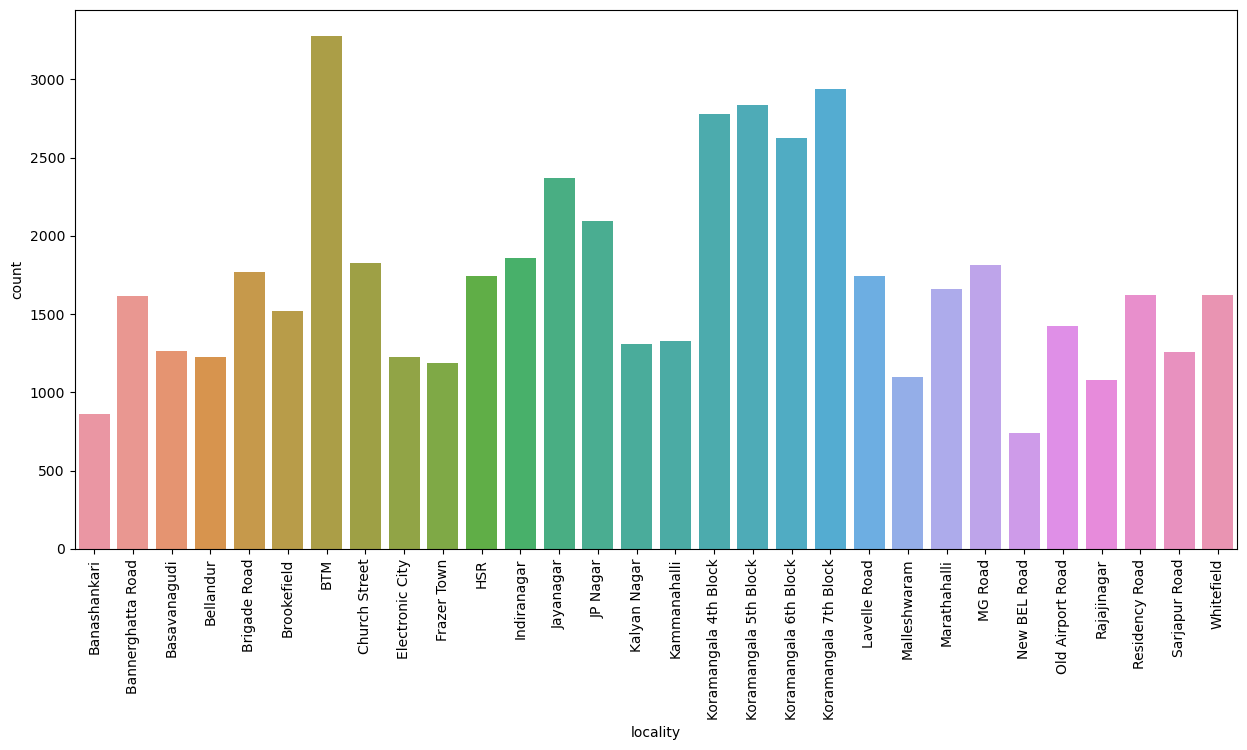

In [15]:
plt.figure(figsize=(15,7))
locality_countplot = sns.countplot(x= "locality", data= df)
plt.xticks(rotation = 90)
plt.show()

### Restaurant type distribution plot¶


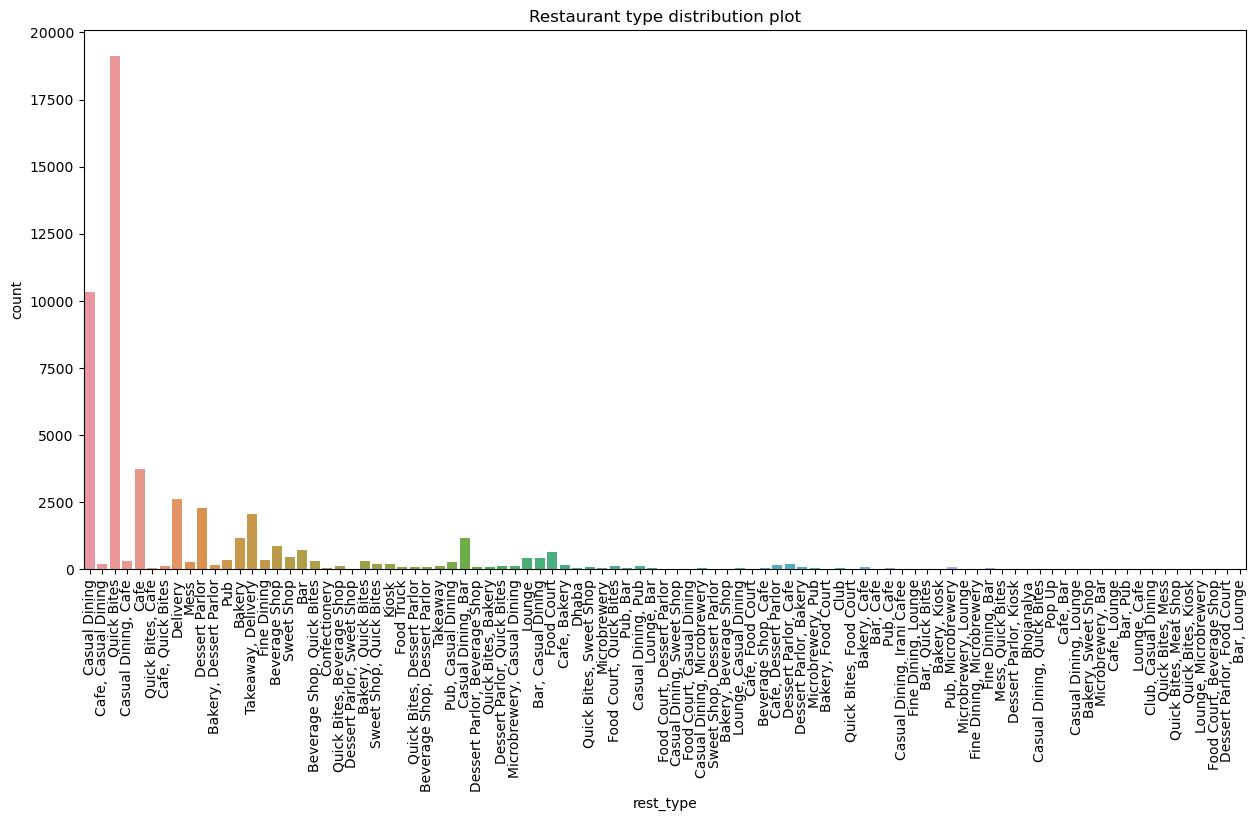

In [16]:
plt.figure(figsize = (15,7))
restaurant_type_countplot = sns.countplot(x = "rest_type", data = df)
plt.xticks(rotation = 90)
plt.title("Restaurant type distribution plot")
plt.show()

### Insight:
 Delivery and Dine-out are the most common restaurant types in Bangalore.


### Is there a relation between online order option and rating of the restaurant?¶


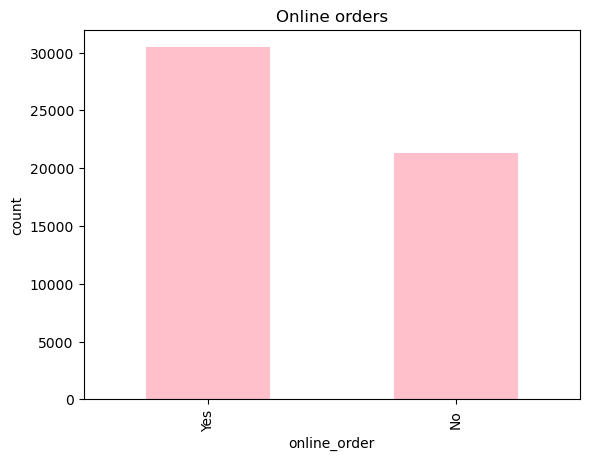

In [17]:
df['online_order'].value_counts().plot(kind = 'bar', color = 'pink')
plt.title('Online orders')
plt.ylabel('count')
plt.show()

<Figure size 1500x900 with 0 Axes>

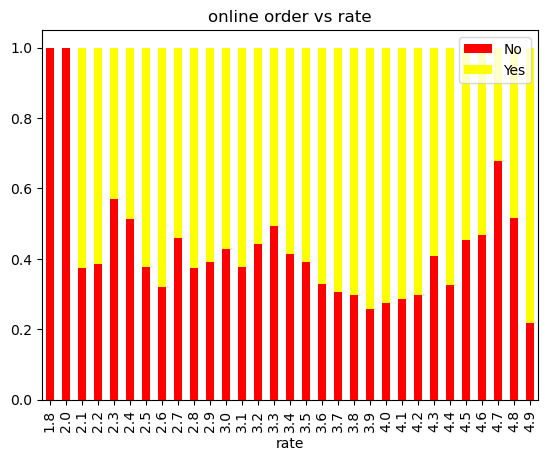

In [18]:
plt.figure(figsize=(15,9))
x=pd.crosstab(df["rate"],df["online_order"])
x.div(x.sum(1).astype(float),axis = 0).plot(kind = 'bar', stacked = True , color= ['red','yellow'])
plt.title("online order vs rate")
plt.legend(loc = "upper right")
plt.show()

### Is there a relation between table booking option and rating of the restaurant?¶


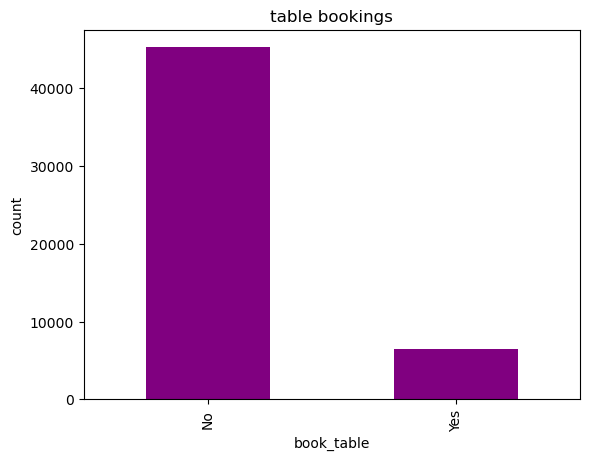

In [19]:
df['book_table'].value_counts().plot(kind = 'bar', color = 'purple')
plt.title("table bookings")
plt.ylabel("count")
plt.show()

<Figure size 1500x900 with 0 Axes>

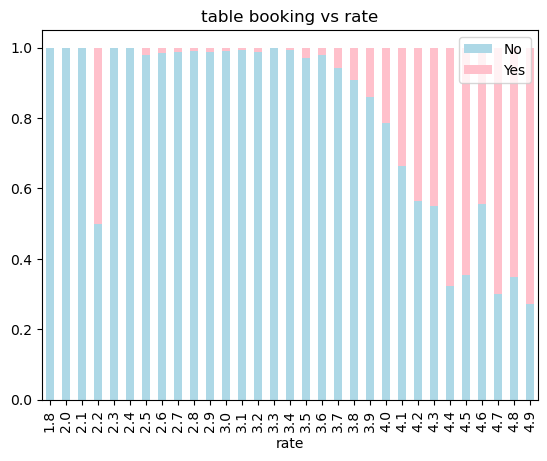

In [20]:
plt.figure(figsize=(15,9))
x=pd.crosstab(df["rate"],df["book_table"])
x.div(x.sum(1).astype(float),axis = 0).plot(kind = 'bar', stacked = True, color= ["lightblue", "pink"])
plt.title("table booking vs rate")
plt.legend(loc = "upper right")
plt.show()

### Cost distribution of all the restaurants in City

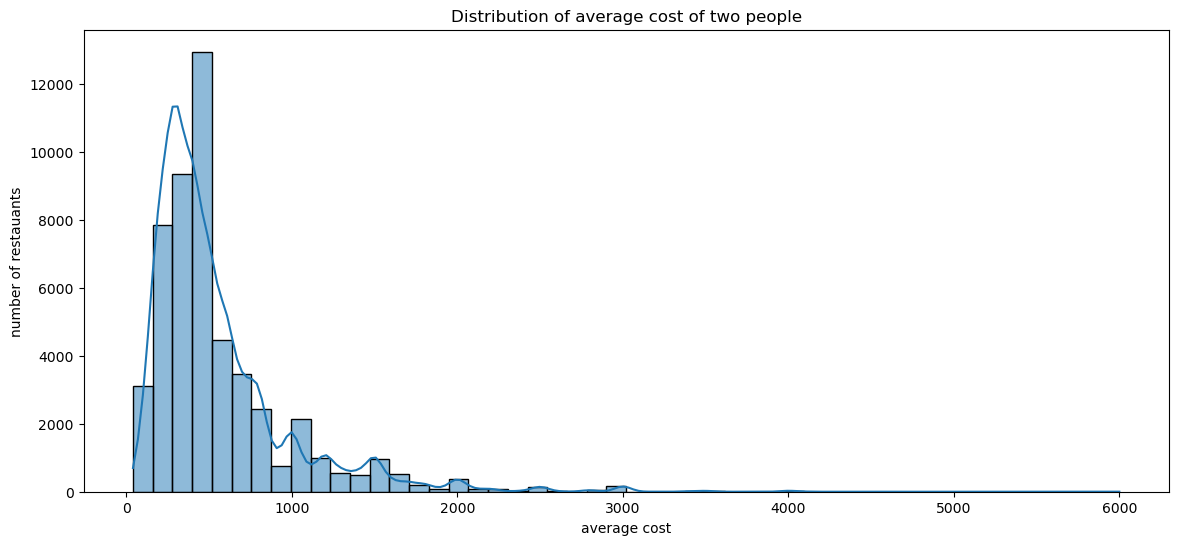

In [21]:
df['average_cost'] = df['average_cost'].astype(str).str.replace(',', '', regex=True)
df['average_cost'] = pd.to_numeric(df['average_cost'], errors='coerce')
plt.figure(figsize=(14,6))
sns.histplot(df['average_cost'],bins = 50,kde = True)
plt.title("Distribution of average cost of two people")
plt.xlabel("average cost")
plt.ylabel("number of restauants")
plt.show()

 ## Insight:
 - Majority of restaurants have an average cost for two between ₹200 to ₹500.


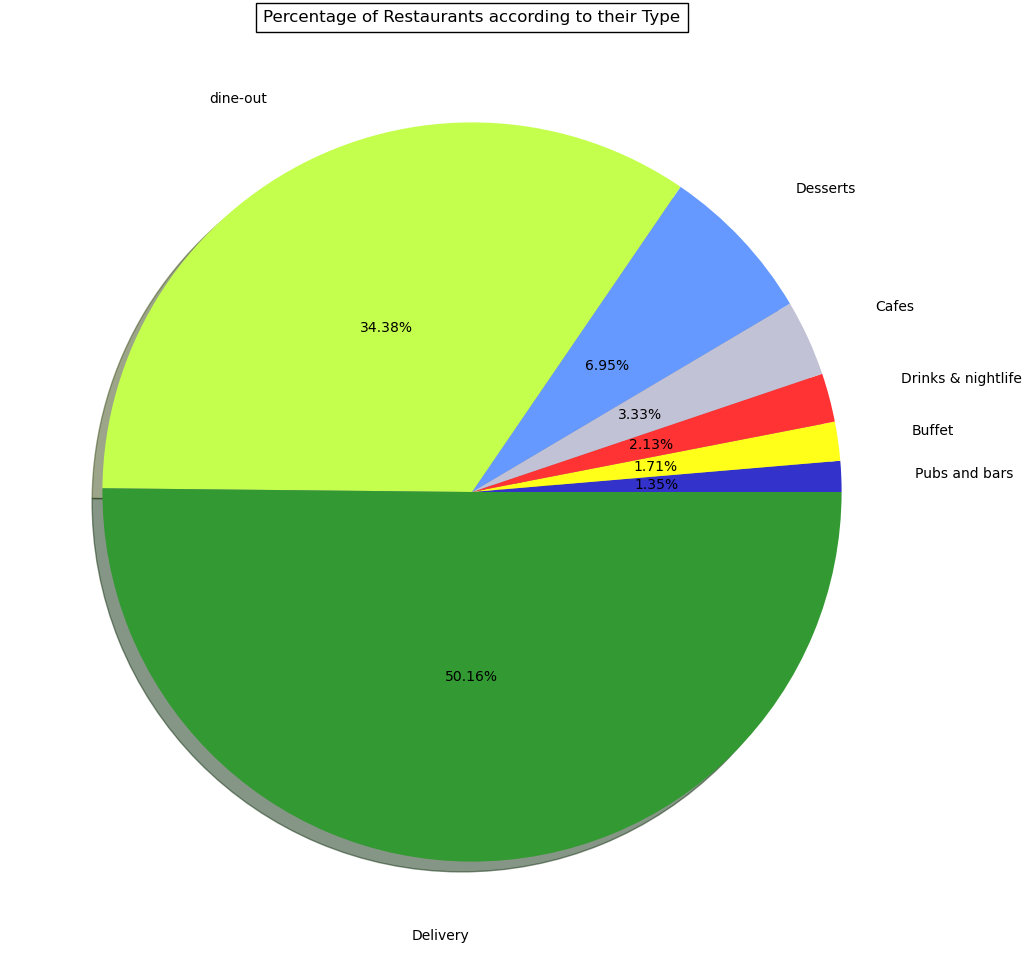

In [22]:
restaurant_type_count = df['restaurant_type'].value_counts().sort_values(ascending=True)
restaurant_type_count
slices = [restaurant_type_count[0],restaurant_type_count[1],restaurant_type_count[2],restaurant_type_count[3],
         restaurant_type_count[4],restaurant_type_count[5],restaurant_type_count[6]]
lables = ['Pubs and bars','Buffet','Drinks & nightlife','Cafes','Desserts','dine-out','Delivery']
colors = ['#3333cc', '#ffff1a', '#ff3333', '#c2c2d6', '#6699ff', '#c4ff4d', '#339933']
plt.pie(slices,colors=colors,labels=lables,autopct= '%1.2f%%', pctdistance = 0.5, labeldistance = 1.2, shadow = True)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their Type", bbox={'facecolor':'1', 'pad':5})
fig.set_size_inches(12, 12)
plt.show()


### Top 10 Cuisines in Bangalore

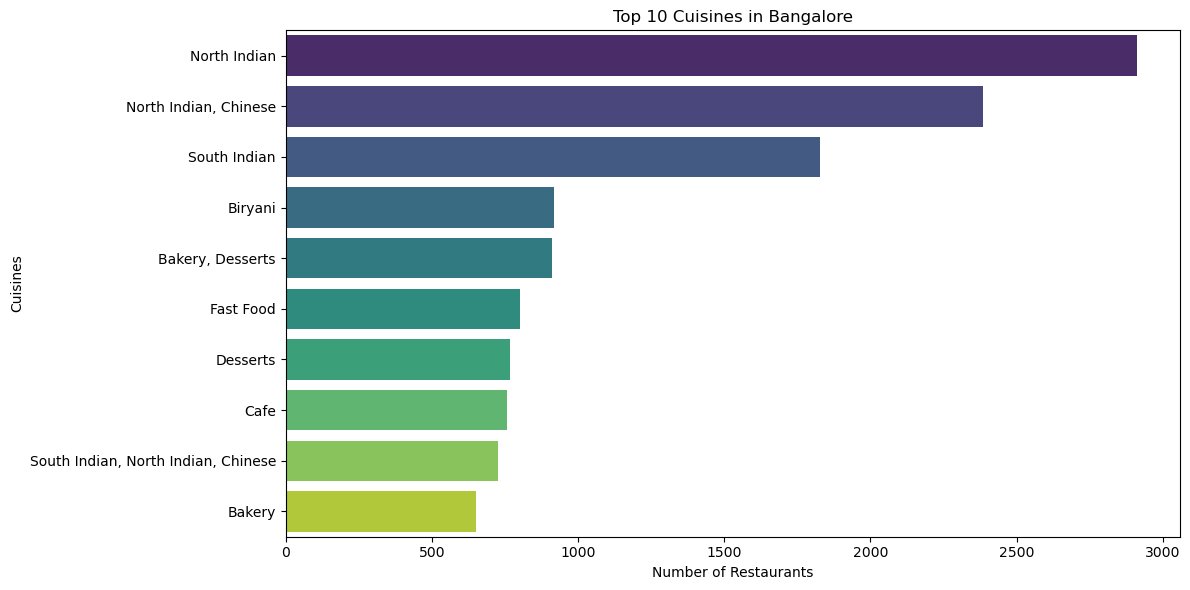

In [23]:
# Top 10 Cuisines
top_cuisines = df['cuisines'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='viridis')
plt.title('Top 10 Cuisines in Bangalore')
plt.xlabel('Number of Restaurants')
plt.ylabel('Cuisines')
plt.tight_layout()
plt.show()


### Insight:
- North Indian and Chinese cuisines dominate Bangalore's restaurant scene.


### Top 10 localities in Bangalore

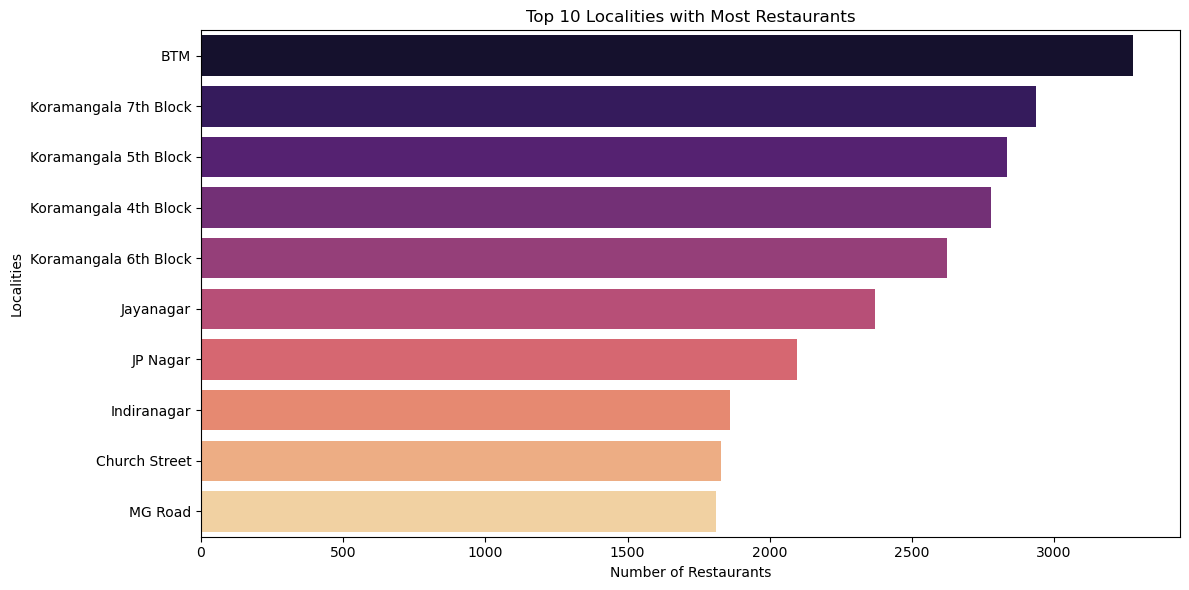

In [24]:
top_localities = df['locality'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_localities.values, y=top_localities.index, palette='magma')
plt.title('Top 10 Localities with Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Localities')
plt.tight_layout()
plt.show()


### Insight:
- BTM, Whitefield, and Koramangala top the list for restaurant density.


## Cost vs Rating Analysis

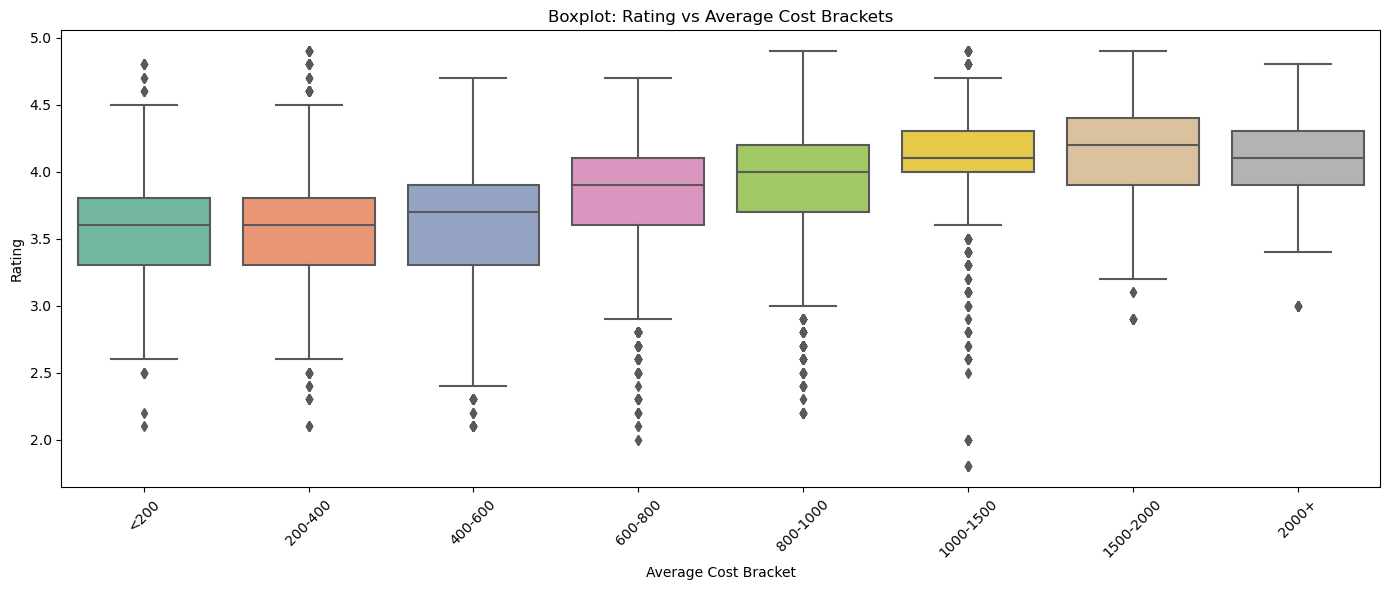

In [25]:
df['cost_bin'] = pd.cut(df['average_cost'], 
                        bins=[0, 200, 400, 600, 800, 1000, 1500, 2000, 5000],
                        labels=['<200','200-400','400-600','600-800','800-1000','1000-1500','1500-2000','2000+'])

plt.figure(figsize=(14,6))
sns.boxplot(x='cost_bin', y='rate', data=df, palette='Set2')
plt.title('Boxplot: Rating vs Average Cost Brackets')
plt.xlabel('Average Cost Bracket')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


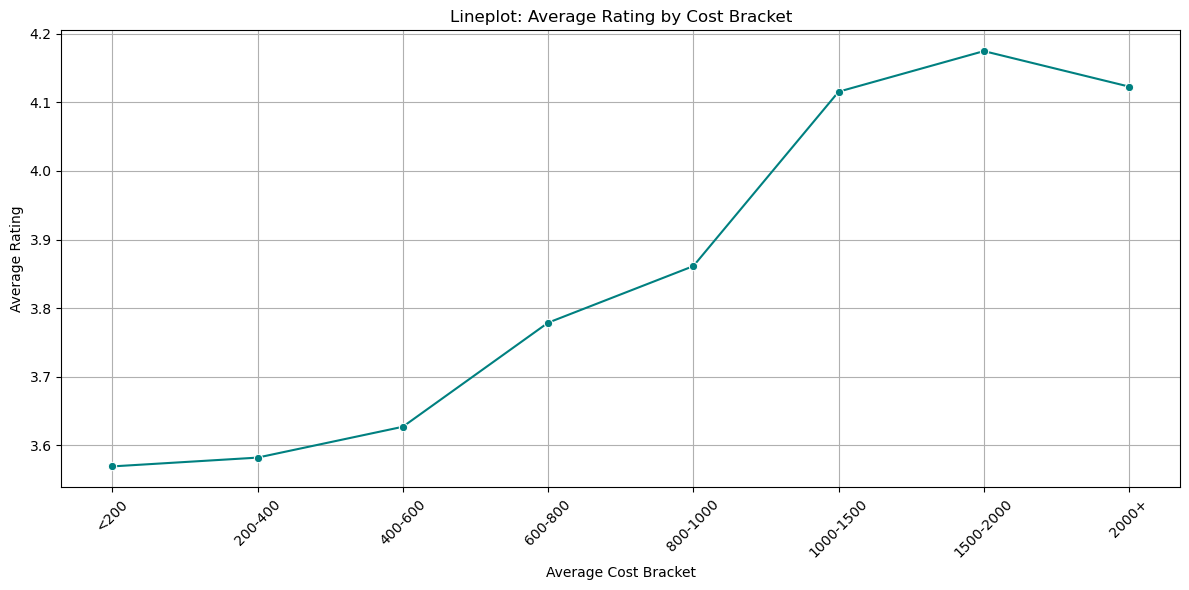

In [26]:
cost_rating = df.groupby('cost_bin')['rate'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=cost_rating, x='cost_bin', y='rate', marker='o', color='teal')
plt.title('Lineplot: Average Rating by Cost Bracket')
plt.xlabel('Average Cost Bracket')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


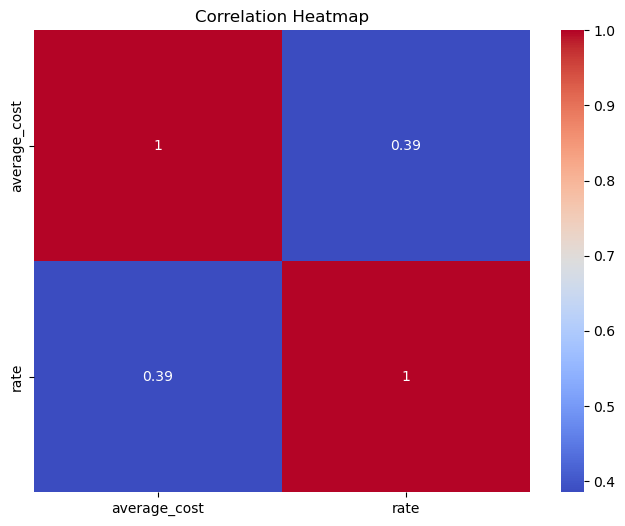

In [27]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['average_cost', 'rate']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


### Insight:
- Weak correlation between cost and rating. Stronger insights come from categorical variables.

### Do restaurants with online order have different cost-rating patterns?


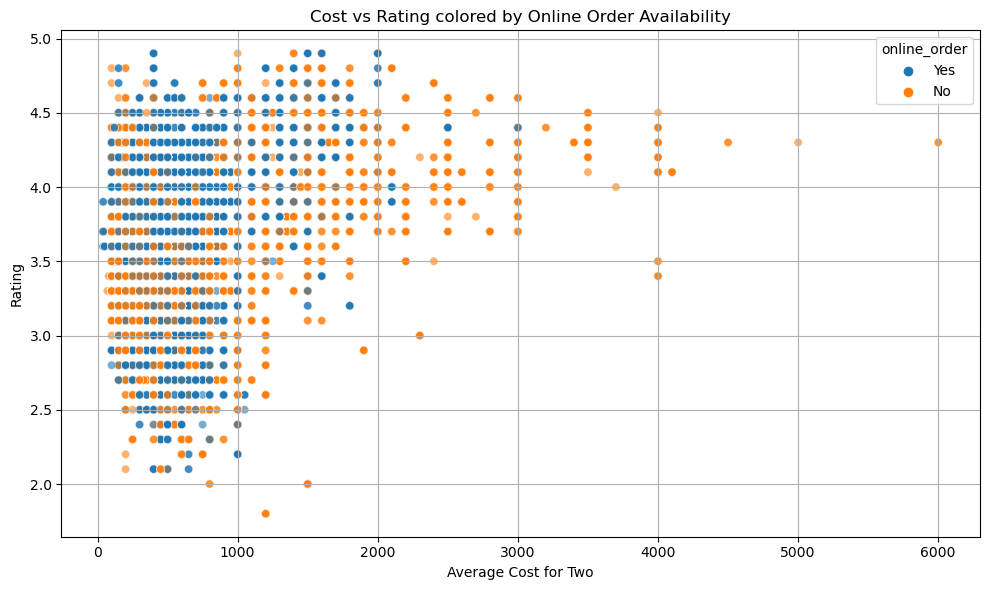

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='average_cost', y='rate', data=df, hue='online_order', alpha=0.6)
plt.title('Cost vs Rating colored by Online Order Availability')
plt.xlabel('Average Cost for Two')
plt.ylabel('Rating')
plt.grid(True)
plt.tight_layout()
plt.show()


## Insight:
- Restaurants with online ordering dominate in the low to mid-price range and have consistent ratings around 4.


## ✅ Key Insights for Zomato Business Decisions

- Most restaurants charge between ₹200–₹500 for two people.
- There is no clear correlation between price and rating.
- Delivery and Dine-out dominate the service types.
- Online order availability is high among mid-range priced restaurants.
- North Indian and Chinese are the most common cuisines.
- BTM, Koramangala, and Whitefield are hotspot localities.
